In [900]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [901]:
train = pd.read_csv('train.csv',parse_dates=['DOB'])
train.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,target,address,postcode,state,country,property_valuation
0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1,060 Morning Avenue,2016,NSW,Australia,10
1,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,6 Meadow Vale Court,2153,NSW,Australia,10
2,Talbot,missing,M,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0,0,0 Holy Cross Court,4211,QLD,Australia,9
3,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0,0,17979 Del Mar Point,2448,NSW,Australia,4
4,Curr,Duckhouse,M,35,1966-09-16,missing,Retail,High Net Worth,N,Yes,13.0,0,9 Oakridge Court,3216,VIC,Australia,9


In [902]:
train.shape

(3489, 17)

In [904]:
train.drop(['first_name','last_name','address'],axis=1,inplace=True)

In [906]:
train.drop('deceased_indicator',axis=1,inplace=True)

In [907]:
train['country'].nunique()

1

In [908]:
train.drop('country',axis=1,inplace=True)

In [909]:
year = []
month = []
day = []

for row in train['DOB']:
    year.append(row.year)
    month.append(row.month)
    day.append(row.day)
train['year'] = year
train['month'] = month
train['day'] = day
train.drop('DOB',axis=1,inplace=True)
train.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,target,postcode,state,property_valuation,year,month,day
0,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,1,2016,NSW,10,1953,10,12
1,M,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,0,2153,NSW,10,1980,12,16
2,M,33,missing,IT,Mass Customer,No,7.0,0,4211,QLD,9,1961,10,3
3,F,56,Senior Editor,missing,Affluent Customer,Yes,8.0,0,2448,NSW,4,1977,5,13
4,M,35,missing,Retail,High Net Worth,Yes,13.0,0,3216,VIC,9,1966,9,16


In [910]:
train['postcode'].nunique()

835

In [912]:
train['job_title'].value_counts()

missing                                 421
Business Systems Development Analyst     40
Social Worker                            38
Tax Accountant                           37
Legal Assistant                          37
                                       ... 
Health Coach III                          2
Health Coach I                            2
Research Assistant III                    2
Geologist II                              2
Developer I                               1
Name: job_title, Length: 196, dtype: int64

In [913]:
train['job_industry_category'].value_counts()

Manufacturing         703
Financial Services    686
missing               560
Health                532
Retail                304
Property              230
IT                    188
Entertainment         123
Argiculture           100
Telecommunications     63
Name: job_industry_category, dtype: int64

In [914]:
cat_titles = train.loc[train['job_industry_category']=='missing','job_title'].value_counts().index[1:]

In [915]:
for each in cat_titles:
    count_series = train.loc[(train['job_title']==each)&(train['job_industry_category']!='missing'),'job_industry_category'].value_counts()
    first_index = count_series.index[0]
    train.loc[(train['job_title']==each)&(train['job_industry_category']=='missing'),'job_industry_category']=first_index
   

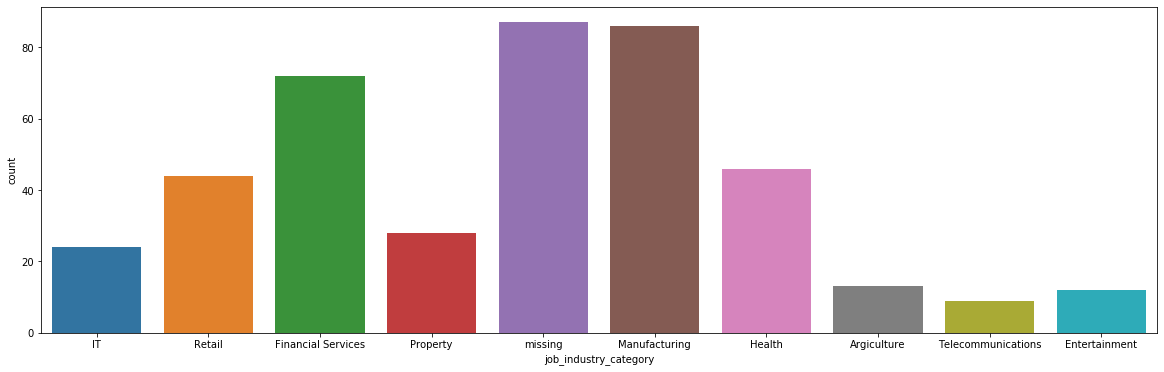

In [916]:
plt.figure(figsize=(20,6))
sns.countplot(train.loc[train['job_title']=='missing','job_industry_category'])

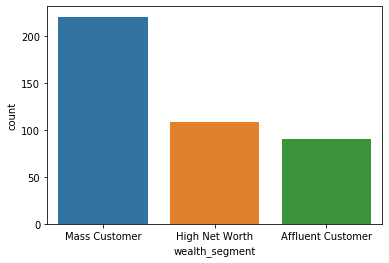

In [917]:
sns.countplot(train.loc[train['job_title']=='missing','wealth_segment'])

In [918]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='IT')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Internal Auditor'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='IT')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Business Systems Development Analyst'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='IT')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Physical Therapy Assistant'

In [919]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Retail')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Sales Representative'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Retail')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Sales Representative'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Retail')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Sales Representative'

In [920]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Financial Services')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'VP Accounting'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Financial Services')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Paralegal'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Financial Services')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Cost Accountant'

In [921]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Property')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Account Executive'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Property')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Business Systems Development Analyst'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Property')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Internal Auditor'

In [922]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Manufacturing')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Chemical Engineer'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Manufacturing')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Nuclear Power Engineer'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Manufacturing')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Electrical Engineer'

In [923]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Health')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Social Worker'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Health')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Social Worker'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Health')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Dental Hygienist'

In [924]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Argiculture')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Desktop Support Technician'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Argiculture')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Editor'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Argiculture')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Account Executive'

In [925]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Telecommunications')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Desktop Support Technician'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Telecommunications')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Junior Executive'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Telecommunications')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Data Coordiator'

In [926]:
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Entertainment')&(train['wealth_segment']=='Mass Customer'),'job_title'] = 'Assistant Media Planner'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Entertainment')&(train['wealth_segment']=='Affluent Customer'),'job_title']='Assistant Media Planner'
train.loc[(train['job_title']=='missing')&(train['job_industry_category']=='Entertainment')&(train['wealth_segment']=='High Net Worth'),'job_title'] = 'Librarian'

In [934]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [935]:
le = LabelEncoder()
le.fit(train['job_title'])
train['job_title'] = le.transform(train['job_title'])

In [937]:
gender_dict = {'F':0,'M':1,'U':2}
car_dict = {'Yes':1,'No':0}
train['gender']=train['gender'].map(gender_dict)
train['owns_car']=train['owns_car'].map(car_dict)


,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,target,postcode,state,property_valuation,year,month,day
0,0,93,71,Health,Mass Customer,1,11.0,1,2016,NSW,10,1953,10,12
1,1,81,19,Financial Services,Mass Customer,1,16.0,0,2153,NSW,10,1980,12,16
2,1,33,95,IT,Mass Customer,0,7.0,0,4211,QLD,9,1961,10,3
3,0,56,149,Manufacturing,Affluent Customer,1,8.0,0,2448,NSW,4,1977,5,13
4,1,35,146,Retail,High Net Worth,1,13.0,0,3216,VIC,9,1966,9,16


In [938]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
ohe.fit(train[['job_industry_category','wealth_segment','state']])
dummy_features = ohe.transform(train[['job_industry_category','wealth_segment','state']])
dummy_df = pd.DataFrame(dummy_features,columns = ohe.get_feature_names())

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [940]:
train = pd.concat([train,dummy_df],axis=1)
train.drop(['job_industry_category','wealth_segment','state'],axis=1,inplace=True)
train.head()

,gender,past_3_years_bike_related_purchases,job_title,owns_car,tenure,target,postcode,property_valuation,year,month,...,x0_Property,x0_Retail,x0_Telecommunications,x0_missing,x1_Affluent Customer,x1_High Net Worth,x1_Mass Customer,x2_NSW,x2_QLD,x2_VIC
0,0,93,71,1,11.0,1,2016,10,1953,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,81,19,1,16.0,0,2153,10,1980,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,33,95,0,7.0,0,4211,9,1961,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,56,149,1,8.0,0,2448,4,1977,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,35,146,1,13.0,0,3216,9,1966,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [941]:

X = train.drop('target',axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size = 0.15,stratify=y)

rf = RandomForestClassifier(n_estimators=400,max_depth=9,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [942]:
pred_train = rf.predict(X_train)
accuracy_score(y_train,pred_train)

0.718381112984823

In [943]:
pred_test = rf.predict(X_test)
accuracy_score(y_test,pred_test)

0.6526717557251909